In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
# replace space in element of object data with underscore
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_") 

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique(), "\n")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48 

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914 

year
[2011 2012 2013 1992 1993]
28 

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10 

engine_hp
[335. 300. 230. 320. 172.]
356 

engine_cylinders
[ 6.  4.  5.  8. 12.]
9 

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5 

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4 

number_of_doors
[ 2.  4.  3. nan]
3 

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71 

vehicle_size
['compact' 'midsize' 'large']
3 

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16 

highway_mpg
[26 28 27 25 24]
59 

city_mpg
[19 20 18 17 16]
69 

popularity
[3916 3105  819  617 1013]
48 

msrp
[46135 40650 

In [8]:
import seaborn as sns 
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

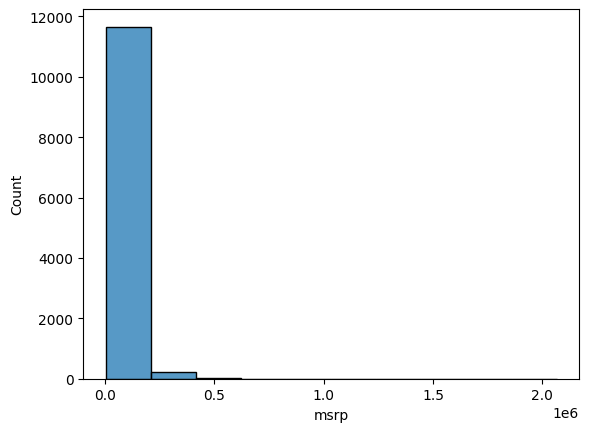

In [9]:
sns.histplot(df.msrp, bins=10)

<Axes: xlabel='msrp', ylabel='Count'>

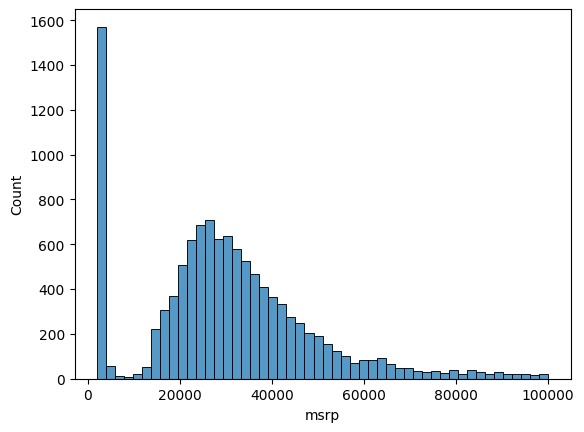

In [10]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [11]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

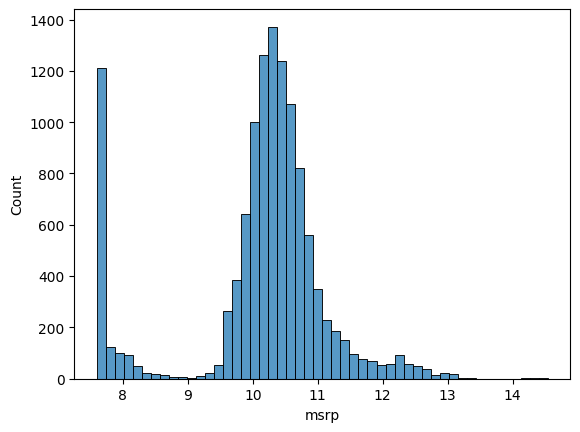

In [12]:
sns.histplot(price_logs, bins=50)

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation Framework

In [14]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

print(n, n_val+n_test+n_train)

11914 11914


In [15]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [16]:
idx = np.arange(n)

In [17]:
np.random.shuffle(idx)

In [18]:
df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [19]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4696,pontiac,firebird,2001,regular_unleaded,200.0,6.0,manual,rear_wheel_drive,2.0,performance,midsize,convertible,28,17,210,25475
10270,chevrolet,tahoe,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,1385,52345
3880,cadillac,eldorado,2000,regular_unleaded,275.0,8.0,automatic,front_wheel_drive,2.0,luxury,large,coupe,25,15,1624,2905
2871,bentley,continental_gt,2016,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,coupe,25,15,520,198500
10166,toyota,tacoma,2015,regular_unleaded,236.0,6.0,manual,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,19,15,2031,27355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,mercedes-benz,e-class,2016,diesel,195.0,4.0,automatic,all_wheel_drive,4.0,"diesel,luxury",midsize,sedan,38,27,617,55150
2839,plymouth,colt,1994,regular_unleaded,113.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,535,2000
11395,aston_martin,virage,2012,premium_unleaded_(required),490.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,13,259,223295
5817,chevrolet,impala_limited,2015,flex-fuel_(unleaded/e85),300.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,30,18,1385,26840


In [20]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11043,toyota,tundra,2017,regular_unleaded,381.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,18,13,2031,31290
10894,audi,tt,2015,premium_unleaded_(recommended),211.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,coupe,31,22,3105,40350
10882,acura,tsx,2013,premium_unleaded_(recommended),201.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,31,22,204,31510
3676,mercedes-benz,e-class,2015,premium_unleaded_(required),577.0,8.0,automatic,all_wheel_drive,4.0,"factory_tuner,luxury,high-performance",midsize,sedan,22,15,617,100600
402,mazda,3,2017,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,586,20145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,mercedes-benz,e-class,2016,diesel,195.0,4.0,automatic,all_wheel_drive,4.0,"diesel,luxury",midsize,sedan,38,27,617,55150
2839,plymouth,colt,1994,regular_unleaded,113.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,535,2000
11395,aston_martin,virage,2012,premium_unleaded_(required),490.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,13,259,223295
5817,chevrolet,impala_limited,2015,flex-fuel_(unleaded/e85),300.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,30,18,1385,26840


In [21]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [23]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## Train Linear Regression

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [25]:
# using the data to train the linear regression model
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

# fill missing value with 0 
X_train = df_train[base] = df_train[base].fillna(0).values

In [27]:
w0, w = train_linear_regression(X_train, y_train)
w0

np.float64(7.546496517323797)

In [28]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

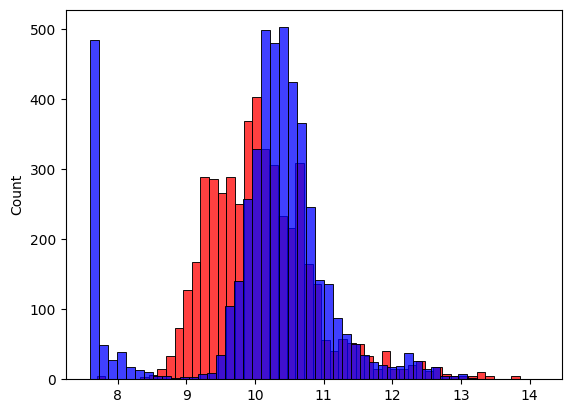

In [29]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', bins=50)

## Calculating RMSE (Root Mean Squared Error)

In [30]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
rmse(y_train, y_pred)

np.float64(0.7573554142325146)

# using t